In [2]:
import h5py as h5
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
filein=h5.File("simulation.hdf5/snap_000.hdf5.html",'r')

In [3]:
header = filein['Header']
print header

<HDF5 group "/Header" (0 members)>


In [4]:
stars = filein['PartType2']
s_positions = np.asarray(stars['Coordinates'])

sx = s_positions[:,0]
sy = s_positions[:,1]
sz = s_positions[:,2]

gas = filein['PartType0']
g_positions = np.asarray(gas['Coordinates'])

gx = g_positions[:,0]
gy = g_positions[:,1]
gz = g_positions[:,2]

BH = filein['PartType5']
BH_positions = np.asarray(BH['Coordinates'])

bhx = BH_positions[:,0]
bhy = BH_positions[:,1]
bhz = BH_positions[:,2]

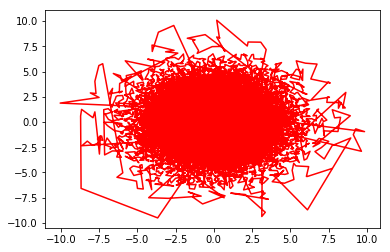

In [5]:
plt.plot(sx,sy,'r-')

(-20, 20)

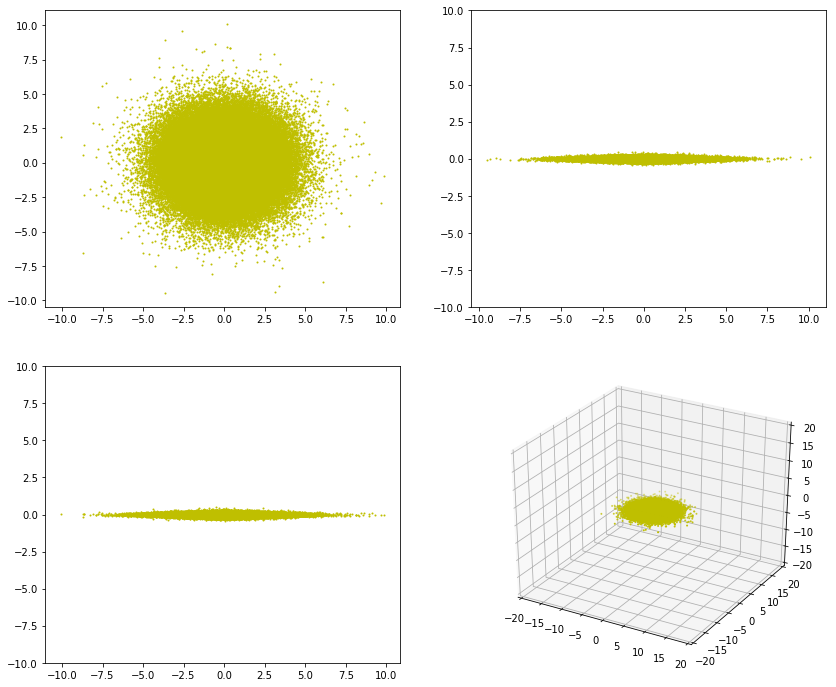

In [6]:
fig = plt.figure(figsize=(14,12))
gs = gridspec.GridSpec(2, 2)

p0 = fig.add_subplot(gs[0,0])
p0.scatter(sx,sy,s=1,c='y')
p1 = fig.add_subplot(gs[0,1])
p1.scatter(sy,sz,s=1,c='y')
p1.set_ylim(-10,10)
p2 = fig.add_subplot(gs[1,0])
p2.scatter(sx,sz,s=1,c='y')
p2.set_ylim(-10,10)
ax = fig.add_subplot(gs[1,1], projection='3d')
ax.scatter(sx,sy,sz, s=1, c='y', depthshade = 5)
ax.set_zlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_xlim3d(-20,20)

(-20, 20)

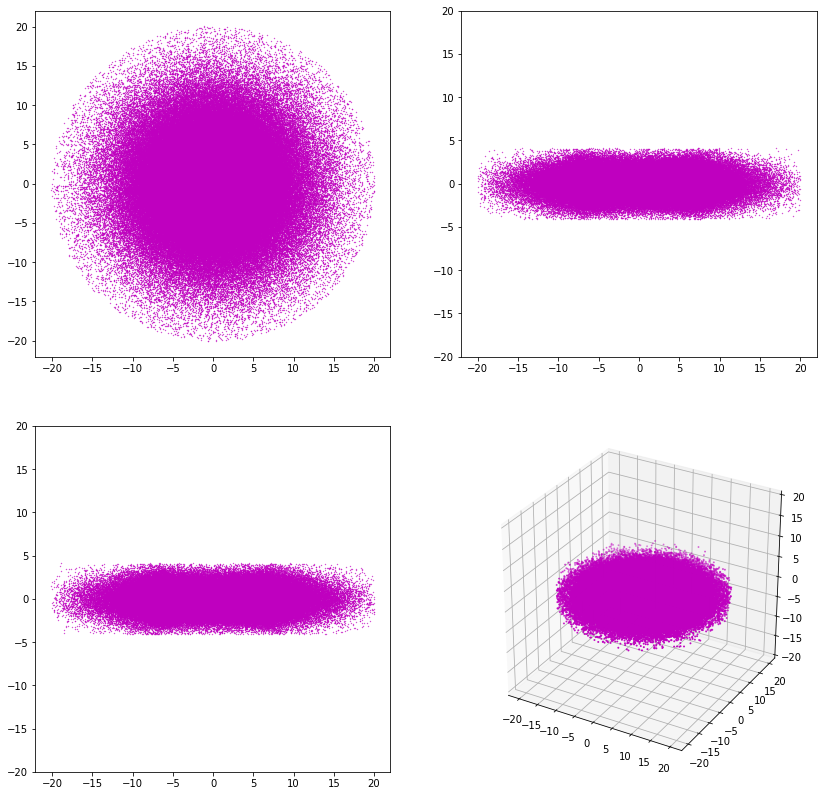

In [7]:
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(2, 2)

p0 = fig.add_subplot(gs[0,0])
p0.scatter(gx,gy,s=0.1,c='m')
p1 = fig.add_subplot(gs[0,1])
p1.scatter(gy,gz,s=0.1,c='m')
p1.set_ylim(-20,20)
p2 = fig.add_subplot(gs[1,0])
p2.scatter(gx,gz,s=0.1,c='m')
p2.set_ylim(-20,20)
ax = fig.add_subplot(gs[1,1], projection='3d')
ax.scatter(gx,gy,gz, s=1, c='m', depthshade = 5)
ax.set_zlim3d(-20,20)

(-20, 20)

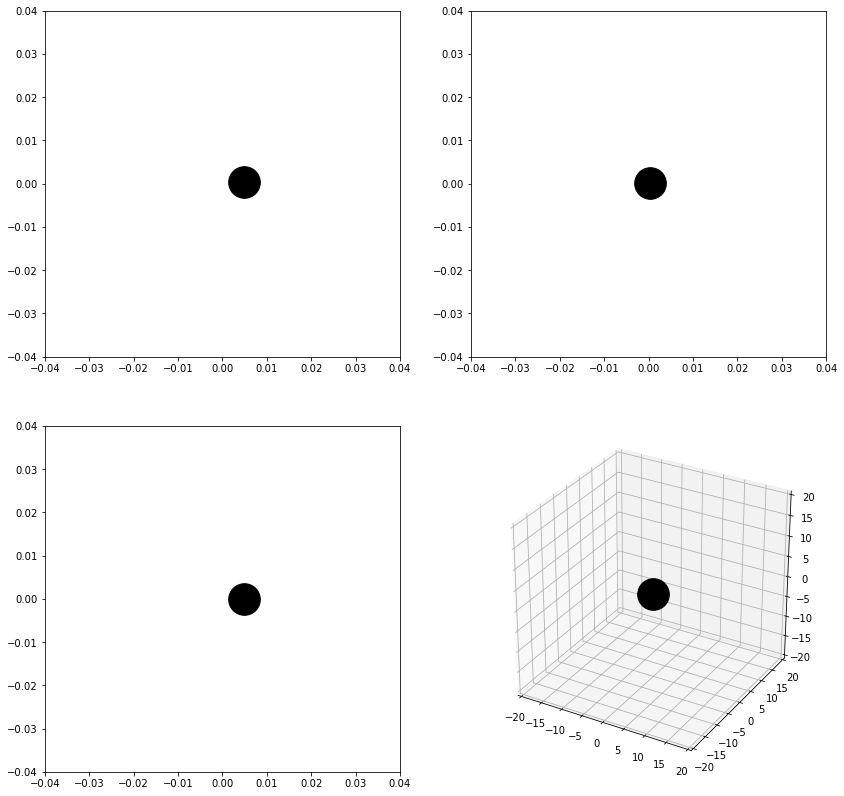

In [8]:
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(2, 2)

p0 = fig.add_subplot(gs[0,0])
p0.scatter(bhx,bhy,s=1000,c='k')
p0.set_xlim(-0.04,0.04)
p0.set_ylim(-0.04,0.04)
p1 = fig.add_subplot(gs[0,1])
p1.scatter(bhy,bhz,s=1000,c='k')
p1.set_xlim(-0.04,0.04)
p1.set_ylim(-0.04,0.04)
p2 = fig.add_subplot(gs[1,0])
p2.scatter(bhx,bhz,s=1000,c='k')
p2.set_xlim(-0.04,0.04)
p2.set_ylim(-0.04,0.04)
ax = fig.add_subplot(gs[1,1], projection='3d')
ax.scatter(bhx,bhy,bhz, s=1000, c='k', depthshade = 0)
ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-20,20)

In [9]:
# from mpl_toolkits.mplot3d import Axes3D

In [10]:
#ax = Axes3D(plt.gcf())
#ax.plot_trisurf(sx, sy, sz)

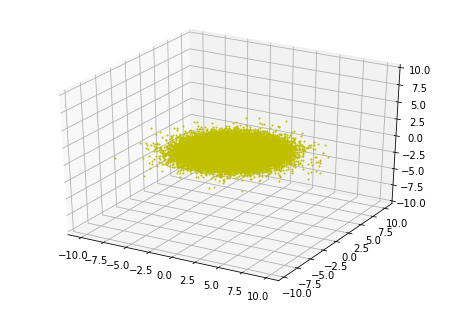

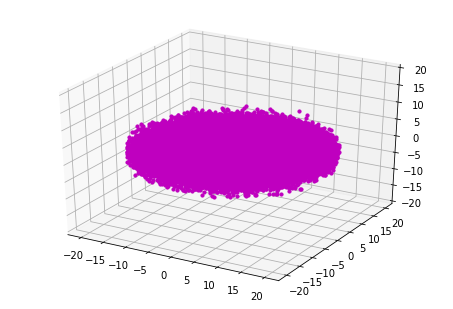

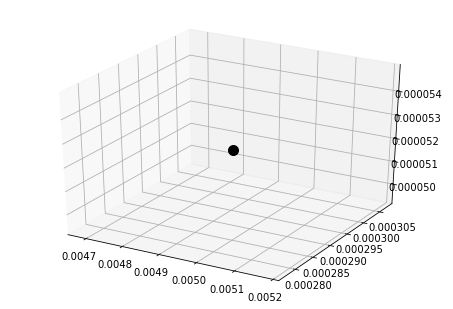

In [11]:
fig = plt.figure()
fig1 = plt.figure()
fig2 = plt.figure()
ax = Axes3D(fig)
bx = Axes3D(fig1)
cx = Axes3D(fig2)
# ax = fig.add_subplot(111, projection='3d')
ax.scatter(sx,sy,sz, s=1, c='y', depthshade = 0)
ax.set_zlim3d(-10,10)
bx.scatter(gx,gy,gz, s=10,c='m', depthshade = 0)
bx.set_zlim3d(-20,20)
cx.scatter(bhx,bhy,bhz,s=100,c='k', depthshade = 0)
plt.show(ax)
plt.show(bx)
plt.show(cx)

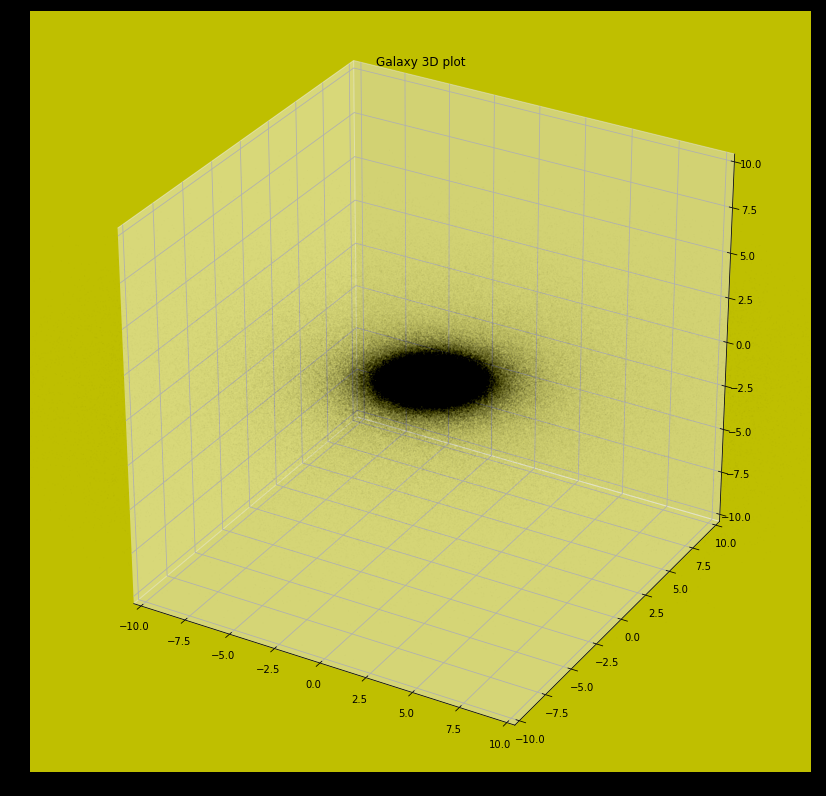

In [12]:
# Create data
gassy = (gx, gy, gz)
starry = (sx, sy, sz)
blackholey = (bhx, bhy, bhz)
 
data = (gassy, starry, blackholey)
colors = ("blue", "red", "white")
groups = ("gas", "stars", "BH") 
 
# Create plot
fig = plt.figure(figsize=(14,14), facecolor = 'k')
ax = fig.add_subplot(1, 1, 1, facecolor = 'y')
ax = fig.gca(projection='3d')

ax.scatter(gx, gy, gz, alpha=0.05, c='y', facecolor = 'y', edgecolors='none', s=0.01, label = 'gas')
ax.scatter(sx, sy, sz, alpha=0.1, c='w', facecolor = 'y',edgecolors='none', s=0.05, label = 'stars')
ax.scatter(bhx, bhy, bhz, alpha=1, c='g', facecolor = 'y',edgecolors='none', s=1000, label = 'BH')
ax.set_zlim3d(-10,10)
ax.set_ylim3d(-10,10)
ax.set_xlim3d(-10,10)
ax.set_facecolor("y")
# for data, color, group in zip(data, colors, groups):
#     x, y, z = data
#     ax.scatter(x, y, z, alpha=0.1, c=color, edgecolors='none', s=1, label=group)
#     ax.set_zlim3d(-20,20)
    
plt.title('Galaxy 3D plot')
#plt.legend(loc=2)
plt.show()

In [13]:
g_mass = np.asarray(gas['Mass'])

BH_mass = np.asarray(BH['BH_Mass'])

In [14]:
lm = header.attrs.__getitem__('MassTable')
s_mass = lm[2]
# s_mass = np.asarray(header['MassTable'])

In [15]:
s_mass

2.0094623720555871e-08

In [16]:
s_mass = s_mass * np.ones(500000)

In [17]:
s_mass

array([  2.00946237e-08,   2.00946237e-08,   2.00946237e-08, ...,
         2.00946237e-08,   2.00946237e-08,   2.00946237e-08])

In [18]:
gcomx = (sum(g_mass * gx)) / sum(g_mass)
gcomy = (sum(g_mass * gy)) / sum(g_mass)
gcomz = (sum(g_mass * gz)) / sum(g_mass)

scomx = (sum(s_mass * sx)) / sum(s_mass)
scomy = (sum(s_mass * sy)) / sum(s_mass)
scomz = (sum(s_mass * sz)) / sum(s_mass)

bhcomx = (sum(BH_mass * bhx)) / sum(BH_mass)
bhcomy = (sum(BH_mass * bhy)) / sum(BH_mass)
bhcomz = (sum(BH_mass * bhz)) / sum(BH_mass)

In [19]:
ngx = gx - gcomx
ngy = gy - gcomy
ngz = gz - gcomz

nsx = sx - scomx
nsy = sy - scomy
nsz = sz - scomz

nbhx = bhx - bhcomx
nbhy = bhy - bhcomy
nbhz = bhz - bhcomz

(-10, 10)

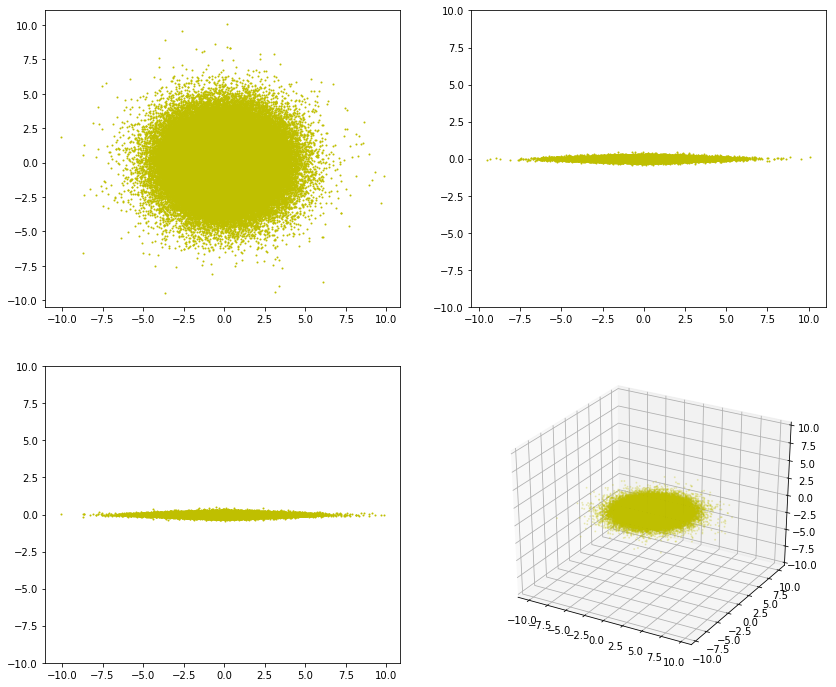

In [29]:
fig = plt.figure(figsize=(14,12))
gs = gridspec.GridSpec(2, 2)

p0 = fig.add_subplot(gs[0,0])
p0.scatter(nsx,nsy,s=1,c='y')
p1 = fig.add_subplot(gs[0,1])
p1.scatter(nsy,nsz,s=1,c='y')
p1.set_ylim(-10,10)
p2 = fig.add_subplot(gs[1,0])
p2.scatter(nsx,nsz,s=1,c='y')
p2.set_ylim(-10,10)
ax = fig.add_subplot(gs[1,1], projection='3d')
ax.scatter(nsx,nsy,nsz, s=1, c='y', alpha = 0.2)
ax.set_zlim3d(-10,10)
# ax.set_ylim3d(-20,20)
# ax.set_xlim3d(-20,20)

(-20, 20)

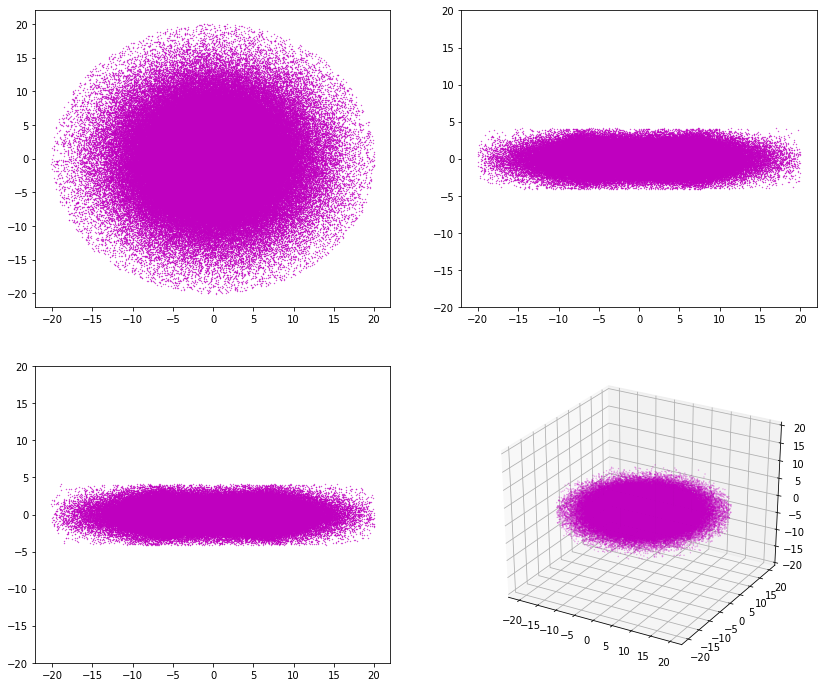

In [30]:
fig = plt.figure(figsize=(14,12))
gs = gridspec.GridSpec(2, 2)

p0 = fig.add_subplot(gs[0,0])
p0.scatter(ngx,ngy,s=0.1,c='m')
p1 = fig.add_subplot(gs[0,1])
p1.scatter(ngy,ngz,s=0.1,c='m')
p1.set_ylim(-20,20)
p2 = fig.add_subplot(gs[1,0])
p2.scatter(ngx,ngz,s=0.1,c='m')
p2.set_ylim(-20,20)
ax = fig.add_subplot(gs[1,1], projection='3d')
ax.scatter(ngx,ngy,ngz, s=0.1, c='m', alpha = 0.5)
ax.set_zlim3d(-20,20)

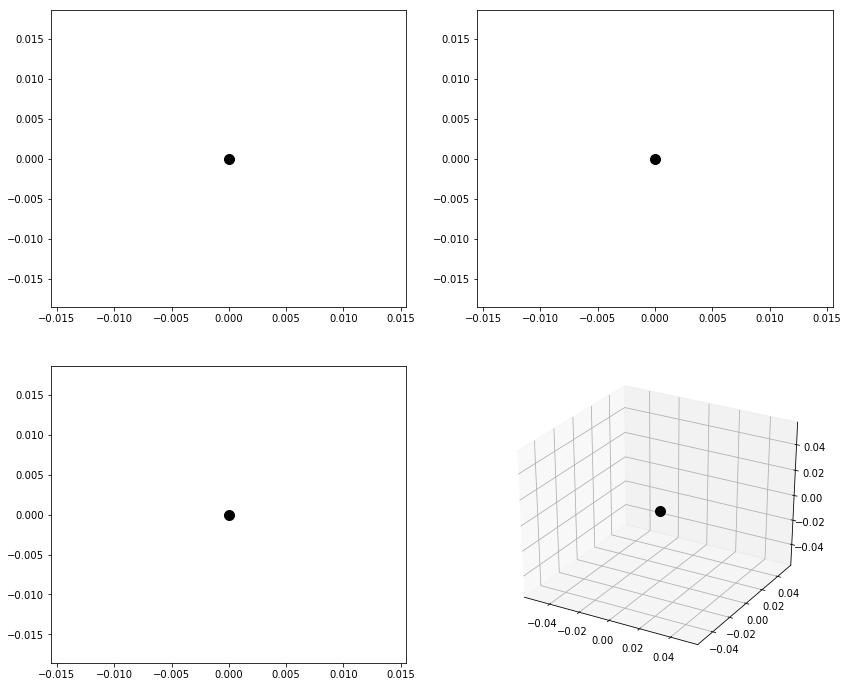

In [26]:
fig = plt.figure(figsize=(14,12))
gs = gridspec.GridSpec(2, 2)

p0 = fig.add_subplot(gs[0,0])
p0.scatter(nbhx,nbhy,s=100,c='k')
p1 = fig.add_subplot(gs[0,1])
p1.scatter(nbhy,nbhz,s=100,c='k')
#p1.set_ylim(-52,-30)
p2 = fig.add_subplot(gs[1,0])
p2.scatter(nbhx,nbhz,s=100,c='k')
#p2.set_ylim(-52,-30)
ax = fig.add_subplot(gs[1,1], projection='3d')
ax.scatter(nbhx,nbhy,nbhz, s=100, c='k', depthshade = 'None')
#ax.set_zlim3d(-52,-30)

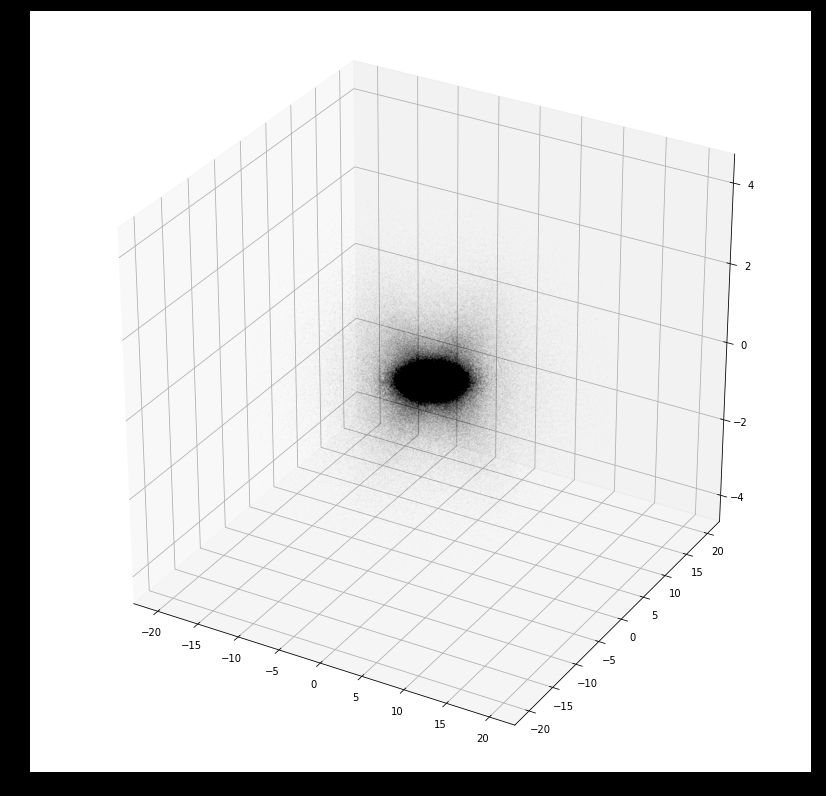

In [31]:
fig = plt.figure(figsize=(14,14), facecolor = 'k')
ax = fig.add_subplot(1, 1, 1, facecolor = 'y')
ax = fig.gca(projection='3d')

ax.scatter(ngx, ngy, ngz, alpha=0.05, c='b', edgecolors='none', s=0.01, label = 'gas')
ax.scatter(nsx, nsy, nsz, alpha=0.1, c='w', edgecolors='none', s=0.05, label = 'stars')
ax.scatter(nbhx, nbhy, nbhz, alpha=1, c='r', edgecolors='none', s=1000, label = 'BH')
ax.set_facecolor('w')

['snapshot', 'x', 'y', 'z']


In [8]:
x = np.arange(9)
print x

[0 1 2 3 4 5 6 7 8]


In [11]:
np.where(x>0)

(array([1, 2, 3, 4, 5, 6, 7, 8]),)